In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('df_input_to_ga.csv')
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [3]:
# making the lengths the same

X = X*10000
X = X.iloc[0:7536,:]
X = X.drop(columns = 'Unnamed: 0')

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#X = clean_dataset(X)
#target = clean_dataset(target)

In [5]:
target_vector = target['Consumption']
input = X

In [6]:
target_vector

0       15417.0
1       14891.0
2       14506.0
3       14226.0
4       14211.0
         ...   
7531    17489.0
7532    16750.0
7533    15963.0
7534    15060.0
7535    14126.0
Name: Consumption, Length: 7536, dtype: float64

In [7]:
X

,AWT26_Power(albany),AWP_200_Power(albany),D2CF_200_Power(albany),AN_Bonus_150/30_Power(albany),Aria_20_Power(albany),WWD-1_D64_Power(albany),Solar_AllMax(albany),Solar_TrinaSolar(albany),Solar_Mitsubishi(albany),Solar_FirstSolar(albany),...,D2CF_200_Power(rochester),AN_Bonus_150/30_Power(rochester),Aria_20_Power(rochester),WWD-1_D64_Power(rochester),AWT26_Power(nyc),AWP_200_Power(nyc),D2CF_200_Power(nyc),AN_Bonus_150/30_Power(nyc),Aria_20_Power(nyc),WWD-1_D64_Power(nyc)
0,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.787639,0.789540,0.056800,3.089083,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
1,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.710669,0.707542,0.052568,2.782100,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
2,0.116604,0.165659,0.407066,0.335845,0.034483,1.604504,0.0,0.0,0.0,0.0,...,0.748565,0.748882,0.054674,2.933339,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
3,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.673941,0.665662,0.050484,2.635616,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
4,0.136386,0.193176,0.439799,0.374229,0.036428,1.725831,0.0,0.0,0.0,0.0,...,0.710669,0.707542,0.052568,2.782100,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0.116604,0.165659,0.407066,0.335845,0.034483,1.604504,0.0,0.0,0.0,0.0,...,0.504479,0.454809,0.040359,1.970426,0.780184,0.729966,1.217985,1.143458,0.078807,4.742065
7532,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.537014,0.496428,0.042347,2.095820,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
7533,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.537014,0.496428,0.042347,2.095820,0.740668,0.708286,1.174633,1.112606,0.076592,4.583050
7534,0.098177,0.139209,0.373651,0.299130,0.032549,1.482213,0.0,0.0,0.0,0.0,...,0.504479,0.454809,0.040359,1.970426,0.662385,0.663375,1.086477,1.047992,0.072143,4.253532


In [8]:
# recognising the solution space for this data:

magnitude_of_consumption_values = np.min(target['Consumption'])

magnitude_of_consumption_values

0.0

In [9]:
min_values = []
max_values = []

min = (5/X.iloc[13,:])
min = min.round(0)
min_values.append(min)

max = (1000/X.iloc[13,:])
max = max.round(0)
max_values.append(max)

In [10]:
weights_size = len(input.iloc[0])
solutions_per_problem = 800

pop_size = (solutions_per_problem, weights_size)
new_population = np.empty(shape= pop_size)

pop = []

for i in range(solutions_per_problem):
    for j in range(34):
        new_population[i][j] = np.random.randint(low = min_values[0][j], high= max_values[0][j])
    
    

In [11]:
new_population[1].shape

(34,)

In [12]:
min_values

[AWT26_Power(albany)                   9.0
 AWP_200_Power(albany)                 8.0
 D2CF_200_Power(albany)                5.0
 AN_Bonus_150/30_Power(albany)         5.0
 Aria_20_Power(albany)                74.0
 WWD-1_D64_Power(albany)               1.0
 Solar_AllMax(albany)                  4.0
 Solar_TrinaSolar(albany)              4.0
 Solar_Mitsubishi(albany)              4.0
 Solar_FirstSolar(albany)              4.0
 AWT26_Power(buffalo)                  5.0
 AWP_200_Power(buffalo)                6.0
 D2CF_200_Power(buffalo)               3.0
 AN_Bonus_150/30_Power(buffalo)        4.0
 Aria_20_Power(buffalo)               55.0
 WWD-1_D64_Power(buffalo)              1.0
 AWT26_Power(binghamton)               9.0
 AWP_200_Power(binghamton)             8.0
 D2CF_200_Power(binghamton)            5.0
 AN_Bonus_150/30_Power(binghamton)     5.0
 Aria_20_Power(binghamton)            74.0
 WWD-1_D64_Power(binghamton)           1.0
 AWT26_Power(rochester)                7.0
 AWP_200_Po

In [13]:
max_values

[AWT26_Power(albany)                   1707.0
 AWP_200_Power(albany)                 1623.0
 D2CF_200_Power(albany)                1002.0
 AN_Bonus_150/30_Power(albany)         1021.0
 Aria_20_Power(albany)                14771.0
 WWD-1_D64_Power(albany)                255.0
 Solar_AllMax(albany)                   741.0
 Solar_TrinaSolar(albany)               741.0
 Solar_Mitsubishi(albany)               742.0
 Solar_FirstSolar(albany)               741.0
 AWT26_Power(buffalo)                   985.0
 AWP_200_Power(buffalo)                1170.0
 D2CF_200_Power(buffalo)                689.0
 AN_Bonus_150/30_Power(buffalo)         763.0
 Aria_20_Power(buffalo)               10913.0
 WWD-1_D64_Power(buffalo)               180.0
 AWT26_Power(binghamton)               1707.0
 AWP_200_Power(binghamton)             1623.0
 D2CF_200_Power(binghamton)            1002.0
 AN_Bonus_150/30_Power(binghamton)     1021.0
 Aria_20_Power(binghamton)            14771.0
 WWD-1_D64_Power(binghamton)      

In [14]:
# fitness of each population:


def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_vector
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness


In [15]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [16]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    
    # Choose mating (crossover) point randomly:
    
    division_point =  np.random.randint(low = 2, high= 4 )
    
    
    crossover_point = np.uint8(offspring_size[1]/ division_point )
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [17]:
# Mutations on the offsprings:

mutation_probability = 80 # In percent

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.
    
    prob = np.random.randint(low = 0, high = 100)
    
    # randomly select the indices that get mutated:
    
    indices_to_mutate = []
    
    for i in range(70):
        r = np.random.randint(0,solutions_per_problem - 10)
        if r not in indices_to_mutate: indices_to_mutate.append(r)
    
    if prob < mutation_probability :
        
        for idx in indices_to_mutate:

        # The random value to be added to the gene.

            random_value = np.random.randint(low = 0 , high= 10)
            
            # select the column to be mutated
            
            col = np.random.randint(low = 0, high = 33)

            offspring_operated[idx, col] = offspring_operated[idx, col] + random_value
                  

    return offspring_operated

In [18]:
num_generations = 100

num_parents_mating = 4

fitness = np.empty(new_population.shape[0])

best_fitnesses = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector,X, new_population[i])
        
    #print("Fitness")    
    #print(fitness)   
    
    #max_index_fitness = np.where(fitness == np.max(fitness))
    #max_fit = fitness[max_index_fitness]
    
    best_fitnesses.append(np.max(fitness))


    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
        
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < 100 :
        
        print("Parents")    
        print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    #print("offspring_crossover")    
    #print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector, X, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


best_solution = new_population[best_match_idx, :]

Parents
[[  480.  1438.   852.   542.  5720.    28.   431.   568.   303.   530.
    536.   977.   417.   415.  2587.   171.   149.  1521.   805.   261.
  11180.   245.  1226.   589.   850.   604. 10330.   172.   996.   777.
     58.   678.  8252.   170.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   165.  1107.   389.   643.   769.
   9675.    60.   892.   190.   560.   793. 11025.   114.   724.   881.
    362.   584.  8697.   146.]
 [  746.   969.   374.   865.  4617.   181.   648.   155.   408.   308.
    191.  1101.   497.   203.  2666.    85.   613.   133.   748.   968.
  13293.   217.   524.   783.   583.   629.  4850.    27.   696.  1180.
    672.   692.  5062.   180.]
 [  605.   871.   280.   809.   157.    53.   617.   526.   143.   596.
    750.   643.   173.   539.  5856.    45.  1391.   475.   442.   791.
   9329.   213.   586.  1076.   593.   887.  5732.   184.   766.   991.
    473.   732.  8439.   166.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   202.  1107.   133.   748.   977.
  13293.   242.   524.   783.   583.   629.  4850.    27.   696.  1187.
    672.   705.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   197.  1107.   133.   748.   977.
  13293.   242.   524.   783.   583.   629.  4850.    27.   696.  1187.
    672.   707.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   193.  1107.   133.   748.   977.
  13293.   242.   524.   783.   583.   629.  4850.    27.   696.  1187.
    672.   716.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   193.  1107.   133.   748.   977.
  13293.   247.   524.   783.   583.   629.  4850.    27.   696.  1187.
    672.   707.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   229.  1107.   133.   748.   977.
  13293.   254.   524.   783.   583.   629.  4850.    35.   704.  1187.
    672.   720.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   229.  1107.   133.   748.   977.
  13293.   254.   524.   783.   583.   629.  4850.    35.   704.  1187.
    672.   720.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   229.  1107.   133.   748.   977.
  13293.   254.   524.   783.   583.   629.  4850.    35.   704.  1187.
    672.   720.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   229.  1107.   133.   748.   977.
  13293.   254.   524.   783.   583.   629.  4850.    35.   704.  1187.
    672.   720.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   262.  1107.   133.   748.   977.
  13293.   260.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   262.  1107.   133.   748.   977.
  13293.   260.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   262.  1107.   133.   748.   977.
  13293.   260.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   262.  1107.   133.   748.   977.
  13293.   260.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   729.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   549.   667. 10761.   305.  1107.   133.   748.   977.
  13293.   267.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   305.  1107.   133.   748.   977.
  13293.   267.   524.   783.   583.   629.  4850.    40.   704.  1187.
    685.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   305.  1107.   133.   748.   977.
  13293.   267.   524.   783.   583.   629.  4850.    40.   704.  1187.
    681.   732.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   540.   667. 10761.   305.  1107.   133.   748.   977.
  13293.   267.   524.   783.   583.   629.  4850.    40.   709.  1187.
    681.   729.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   553.   675. 10761.   320.  1107.   133.   748.   977.
  13293.   283.   524.   783.   583.   629.  4850.    48.   713.  1187.
    685.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   553.   675. 10761.   320.  1107.   133.   748.   977.
  13293.   274.   524.   783.   583.   629.  4850.    48.   722.  1187.
    685.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   553.   675. 10761.   320.  1107.   133.   748.   977.
  13293.   276.   524.   783.   583.   629.  4850.    48.   713.  1187.
    685.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   553.   675. 10761.   320.  1107.   133.   748.   977.
  13293.   274.   524.   783.   583.   629.  4850.    48.   719.  1187.
    685.   729.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   350.  1107.   133.   754.   977.
  13293.   292.   524.   783.   583.   629.  4850.    48.   713.  1194.
    690.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   343.  1107.   133.   754.   977.
  13293.   300.   524.   783.   583.   629.  4850.    48.   713.  1194.
    690.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   343.  1107.   133.   754.   977.
  13293.   292.   524.   783.   583.   629.  4850.    48.   713.  1194.
    699.   729.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   343.  1107.   133.   754.   977.
  13293.   292.   524.   783.   583.   629.  4850.    57.   713.  1194.
    690.   729.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   372.  1107.   133.   758.   977.
  13293.   332.   524.   783.   583.   629.  4850.    48.   713.  1194.
    694.   737.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   364.  1107.   133.   758.   977.
  13293.   337.   524.   783.   583.   629.  4850.    48.   713.  1194.
    690.   744.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   370.  1107.   133.   758.   977.
  13293.   332.   524.   783.   583.   629.  4850.    48.   713.  1194.
    691.   737.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   364.  1107.   133.   758.   977.
  13293.   332.   524.   783.   583.   629.  4850.    48.   713.  1202.
    690.   744.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   568.   675. 10761.   403.  1107.   133.   758.   977.
  13293.   357.   524.   783.   583.   629.  4850.    48.   713.  1202.
    705.   744.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   403.  1107.   133.   758.   977.
  13293.   357.   524.   783.   583.   629.  4850.    54.   713.  1202.
    705.   744.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   403.  1107.   133.   758.   977.
  13293.   357.   524.   783.   583.   629.  4850.    48.   721.  1202.
    705.   744.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   403.  1107.   133.   758.   977.
  13293.   357.   524.   783.   583.   629.  4850.    52.   713.  1202.
    705.   744.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   428.  1107.   133.   758.   977.
  13293.   366.   524.   783.   583.   629.  4850.    48.   721.  1202.
    721.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   422.  1107.   133.   758.   977.
  13293.   366.   524.   783.   583.   629.  4850.    48.   721.  1202.
    729.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   422.  1107.   133.   758.   977.
  13293.   366.   524.   783.   583.   629.  4850.    48.   721.  1202.
    728.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   675. 10761.   422.  1107.   133.   758.   977.
  13293.   366.   524.   783.   583.   629.  4850.    48.   721.  1202.
    721.   759.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   677. 10761.   454.  1107.   133.   758.   977.
  13293.   377.   524.   783.   583.   629.  4850.    48.   721.  1202.
    729.   762.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   677. 10761.   446.  1107.   133.   758.   977.
  13293.   389.   524.   783.   583.   629.  4850.    48.   721.  1202.
    729.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   677. 10761.   446.  1107.   133.   758.   977.
  13293.   382.   524.   783.   583.   629.  4850.    48.   721.  1202.
    729.   761.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   559.   677. 10761.   446.  1107.   133.   758.   977.
  13293.   380.   524.   783.   583.   629.  4850.    48.   721.  1202.
    729.   762.  5062.   180.]]
Par

Parents
[[  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   567.   677. 10761.   476.  1107.   133.   758.   977.
  13293.   410.   524.   783.   583.   629.  4850.    48.   721.  1202.
    736.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   567.   677. 10761.   472.  1107.   133.   758.   977.
  13293.   408.   524.   783.   583.   629.  4850.    48.   721.  1202.
    736.   760.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   567.   677. 10761.   472.  1107.   133.   758.   977.
  13293.   401.   524.   783.   583.   629.  4850.    48.   721.  1211.
    745.   753.  5062.   180.]
 [  428.   470.   426.   953.  7799.   214.    18.    93.   435.   653.
    106.    64.   567.   677. 10761.   472.  1107.   133.   758.   977.
  13293.   410.   524.   783.   583.   629.  4850.    48.   721.  1206.
    736.   753.  5062.   180.]]
Bes

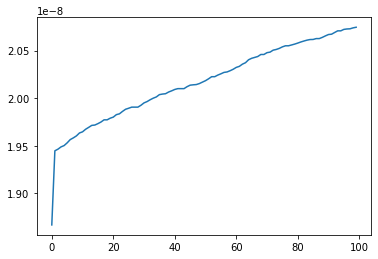

In [19]:
import matplotlib.pyplot as plt

plt.plot(best_fitnesses)




In [20]:
final_electricity = np.sum(best_solution[0][0]*X, axis = 1)

In [21]:
error = target['Consumption'] - final_electricity


day = np.arange(len(error))
day1 = np.arange(len(error) - 1)

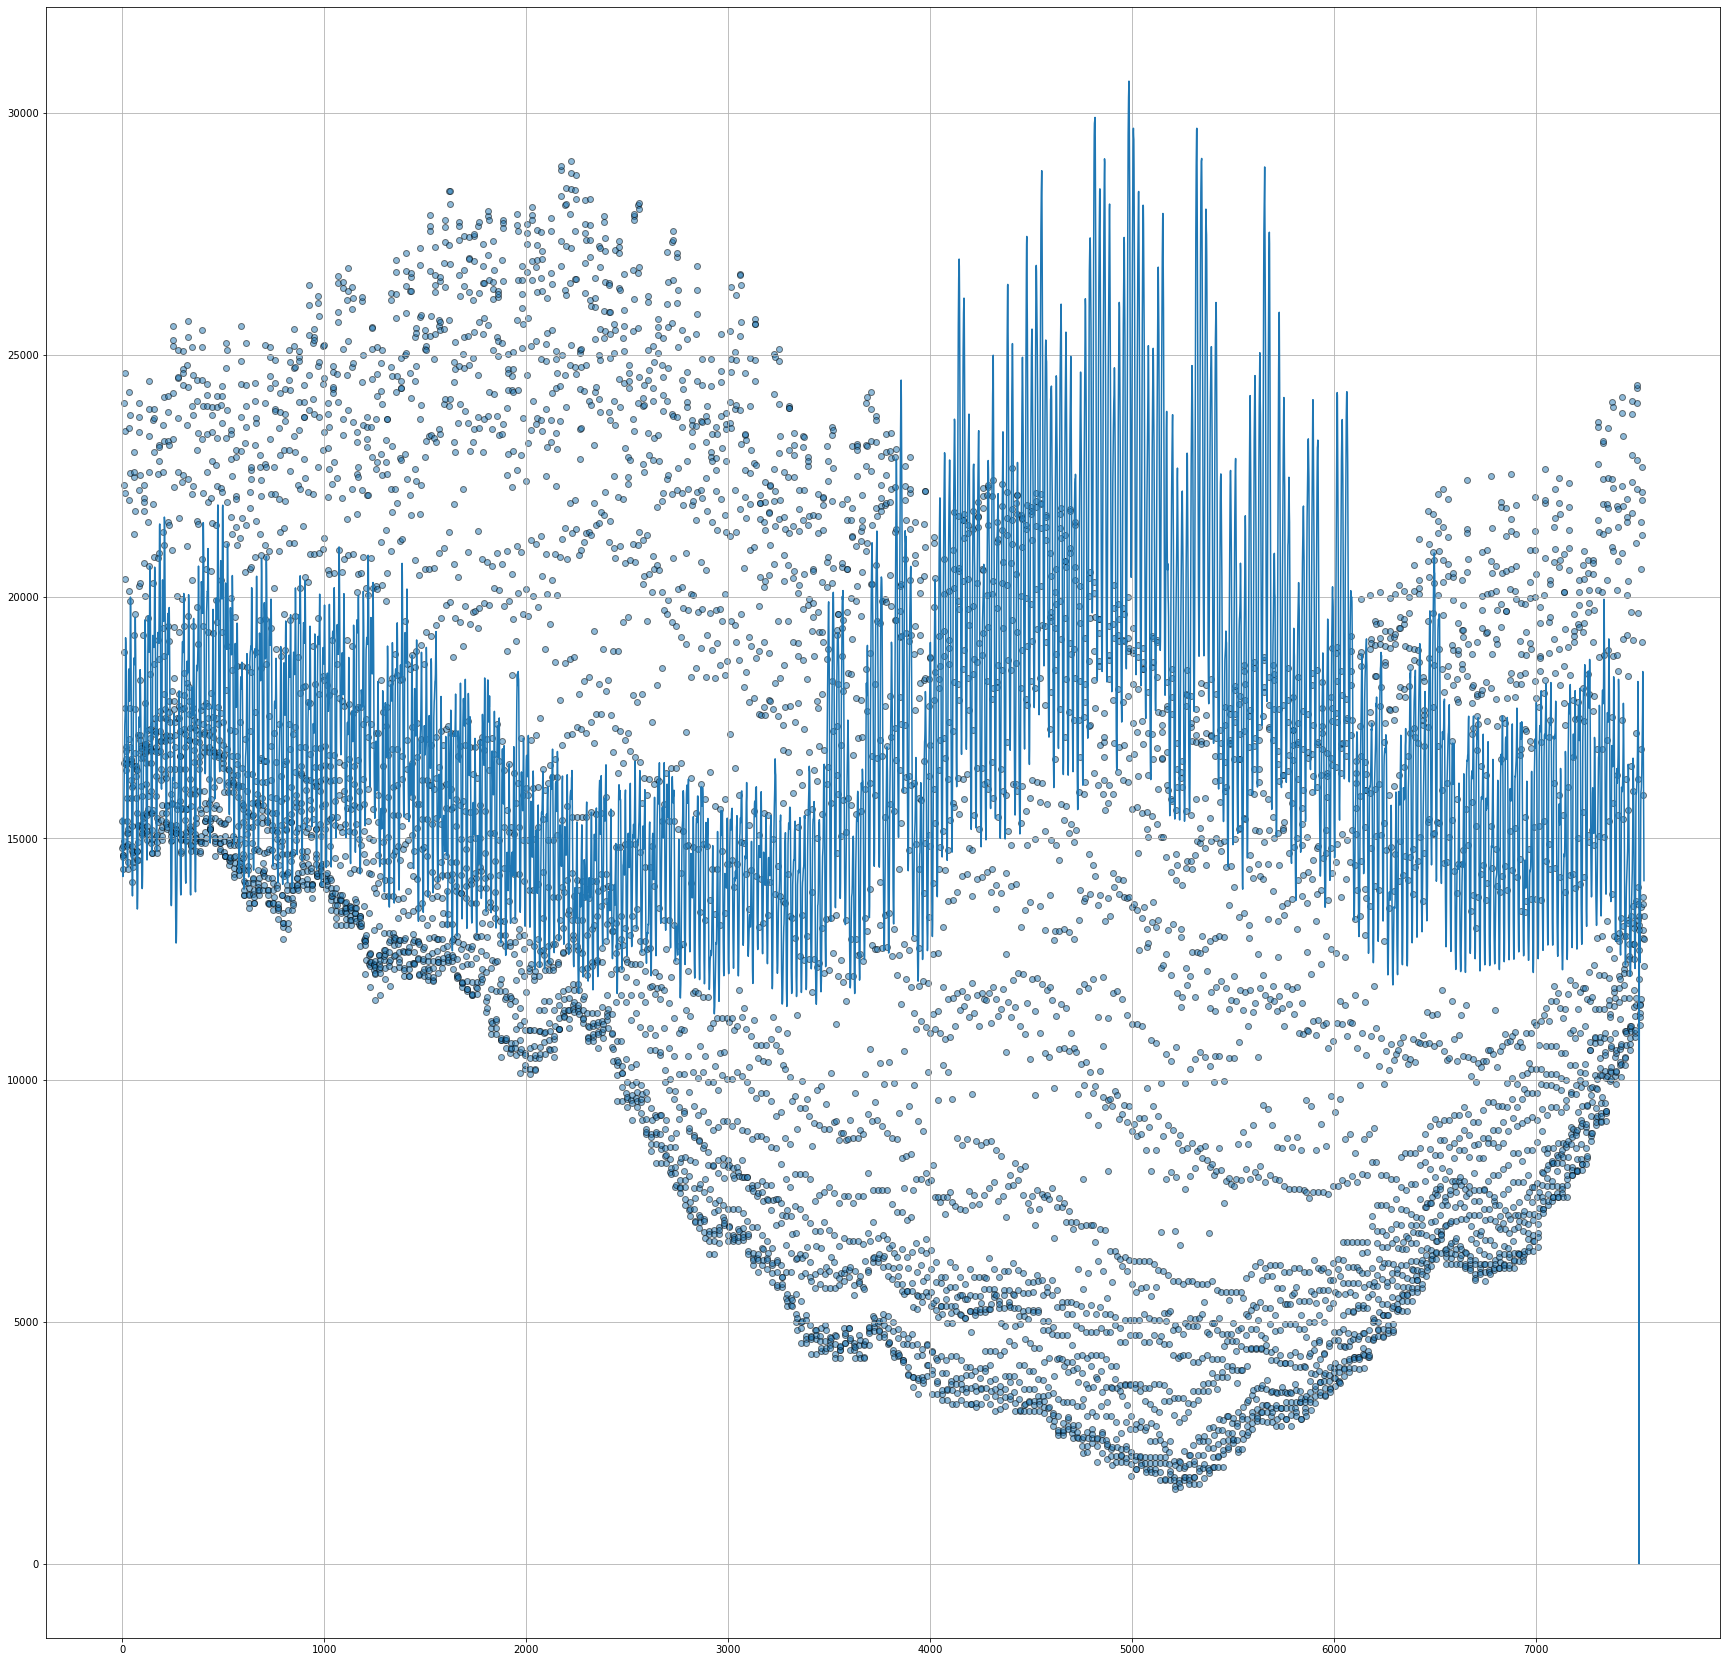

In [22]:
plt.figure(figsize=(30,30))

plt.scatter(x = day, y = final_electricity, alpha = 0.5, edgecolors= 'black')

plt.plot(day, target['Consumption'])


plt.grid()

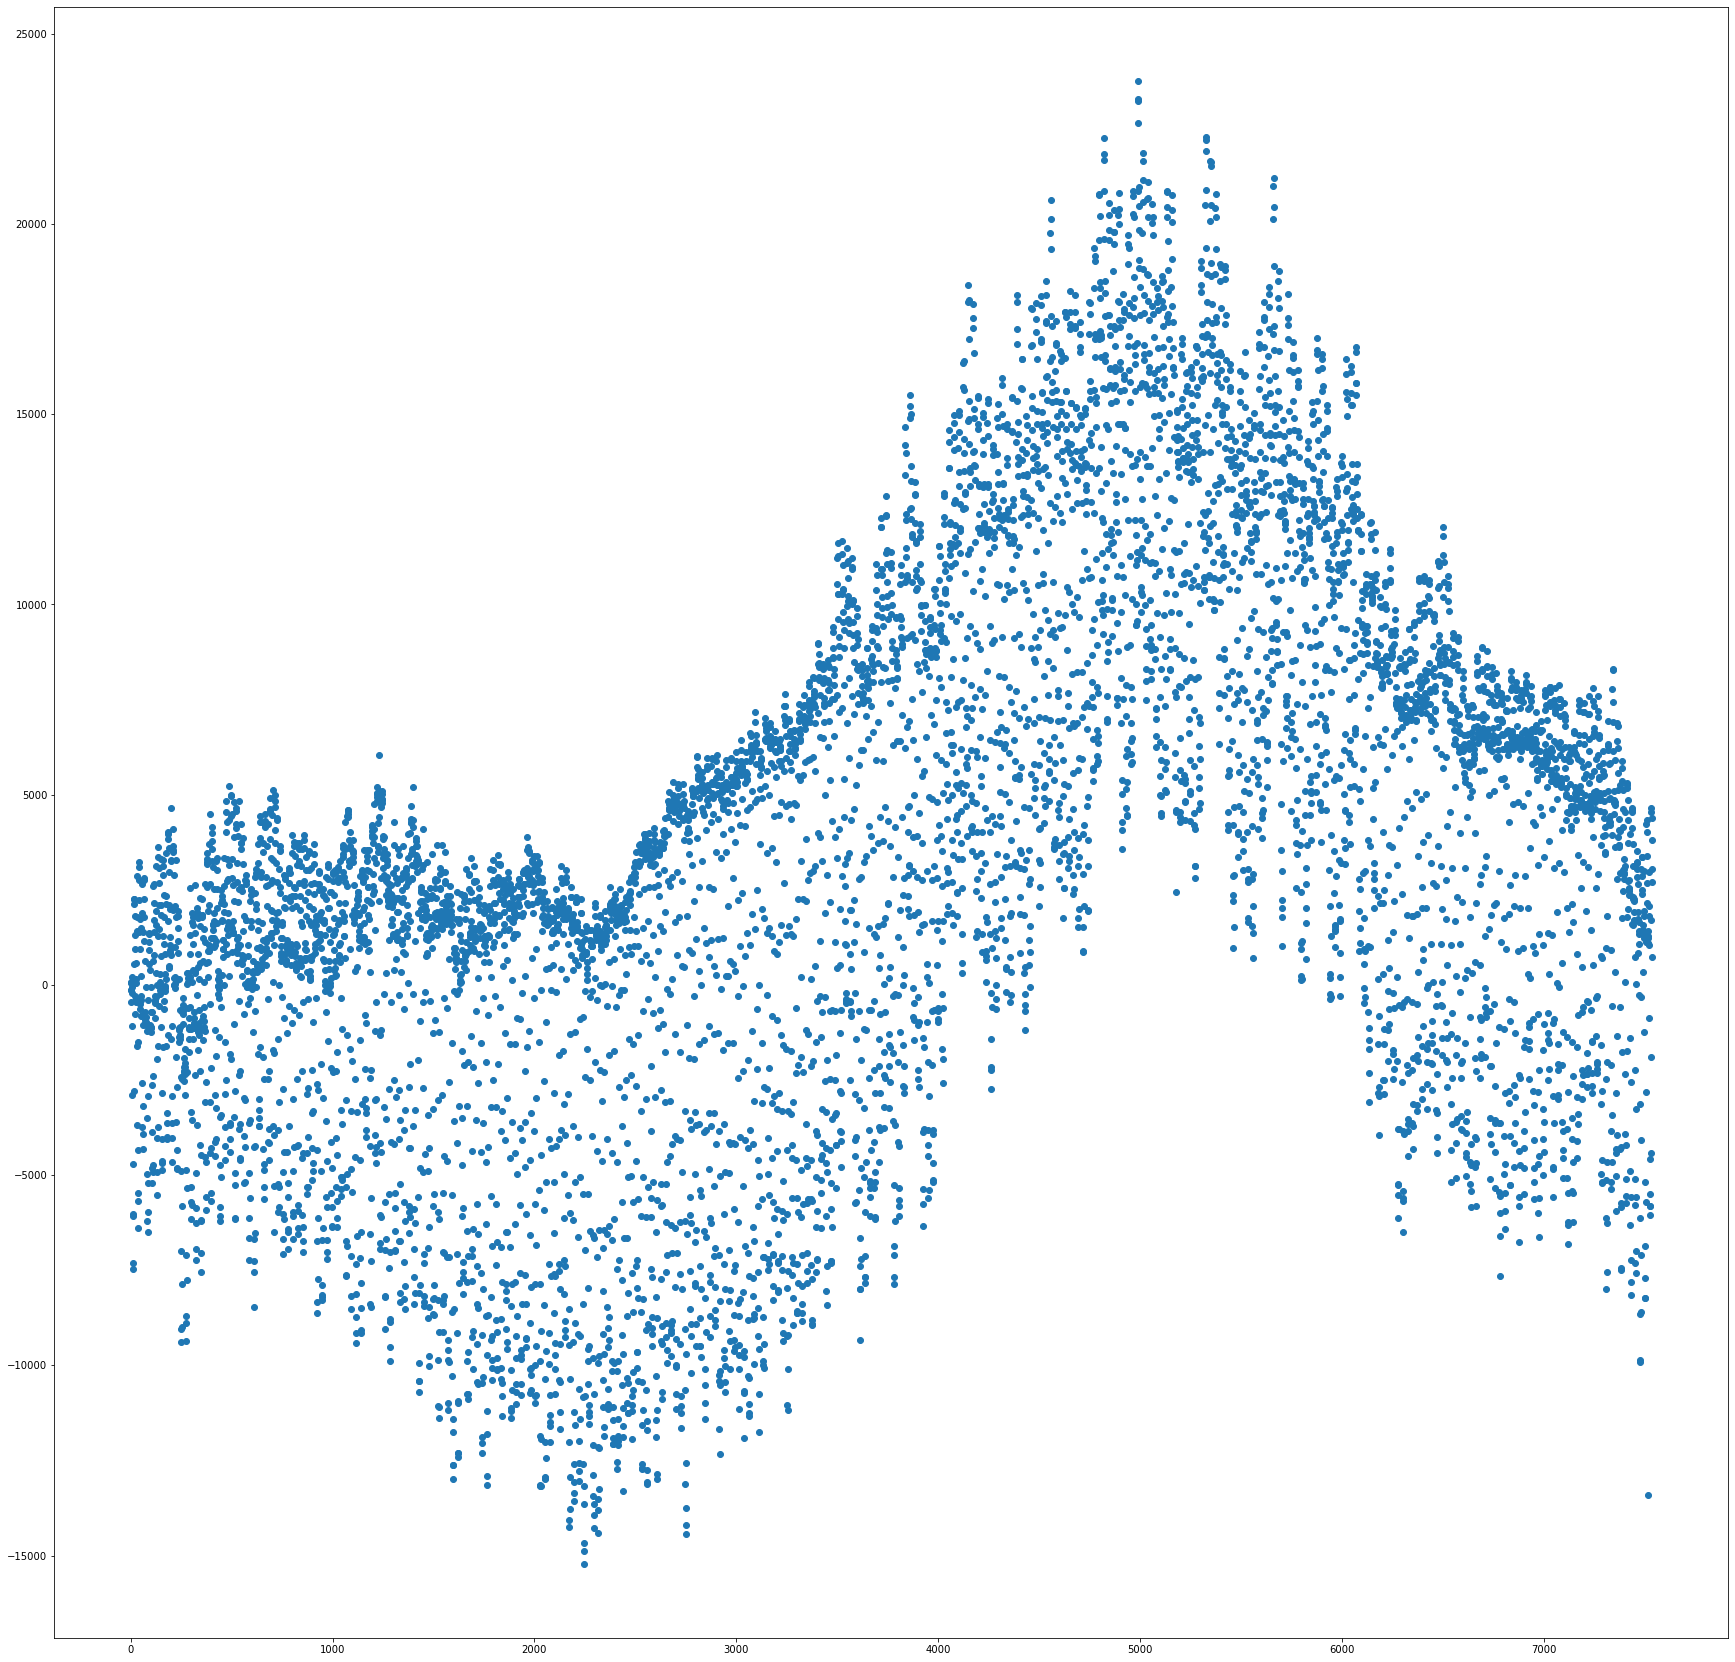

In [23]:
plt.figure(figsize=(30,30))

plt.scatter(day, error)

In [24]:
X.columns

Index(['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(buffalo)', 'AWP_200_Power(buffalo)',
       'D2CF_200_Power(buffalo)', 'AN_Bonus_150/30_Power(buffalo)',
       'Aria_20_Power(buffalo)', 'WWD-1_D64_Power(buffalo)',
       'AWT26_Power(binghamton)', 'AWP_200_Power(binghamton)',
       'D2CF_200_Power(binghamton)', 'AN_Bonus_150/30_Power(binghamton)',
       'Aria_20_Power(binghamton)', 'WWD-1_D64_Power(binghamton)',
       'AWT26_Power(rochester)', 'AWP_200_Power(rochester)',
       'D2CF_200_Power(rochester)', 'AN_Bonus_150/30_Power(rochester)',
       'Aria_20_Power(rochester)', 'WWD-1_D64_Power(rochester)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', '

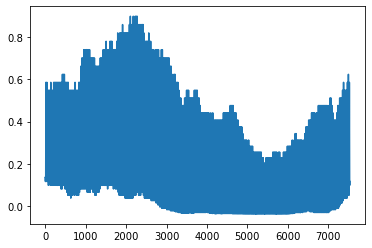

In [25]:
plt.plot(X['AWT26_Power(albany)'])

In [26]:
X.columns

Index(['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(buffalo)', 'AWP_200_Power(buffalo)',
       'D2CF_200_Power(buffalo)', 'AN_Bonus_150/30_Power(buffalo)',
       'Aria_20_Power(buffalo)', 'WWD-1_D64_Power(buffalo)',
       'AWT26_Power(binghamton)', 'AWP_200_Power(binghamton)',
       'D2CF_200_Power(binghamton)', 'AN_Bonus_150/30_Power(binghamton)',
       'Aria_20_Power(binghamton)', 'WWD-1_D64_Power(binghamton)',
       'AWT26_Power(rochester)', 'AWP_200_Power(rochester)',
       'D2CF_200_Power(rochester)', 'AN_Bonus_150/30_Power(rochester)',
       'Aria_20_Power(rochester)', 'WWD-1_D64_Power(rochester)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', '

In [27]:
best_solution[0][0]

array([  428.,   470.,   426.,   953.,  7799.,   214.,    18.,    93.,
         435.,   653.,   106.,    64.,   567.,   685., 10761.,   476.,
        1107.,   133.,   758.,   977., 13293.,   408.,   524.,   783.,
         583.,   629.,  4850.,    48.,   721.,  1202.,   736.,   760.,
        5062.,   180.])

In [28]:
list

list